In [ ]:
!sudo apt-get update -y
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super -y
!pip install SciencePlots

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian buster/main amd64 Packages [7,909 kB]
Get:5 http://deb.debian.org/debian-security buster/updates/main amd64 Packages [603 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8,788 B]
Fetched 8,734 kB in 3s (3,464 kB/s)




The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libauthen-sasl-perl libbrotli1 libcups2 libcupsfilters1 libcupsimage2
  libdata-dump-perl libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libdrm2 libencode-locale-perl libfile-basedir-perl
  libfile-desktopentry-perl libfile-listing-perl libfile-mimeinfo-perl
  libfont-afm-perl libfontenc1 

In [ ]:
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scienceplots
plt.style.use('science')

/tmp/ipykernel_37/2862352681.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  bar_plot = sns.barplot(x='Setting', y='Mean', data=df, ci=True, palette=colors, ax=axes[idx_plot])
/tmp/ipykernel_37/2862352681.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Setting', y='Mean', data=df, ci=True, palette=colors, ax=axes[idx_plot])
/tmp/ipykernel_37/2862352681.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx_plot].set_xticklabels(current_labels, rotation=30, ha='right')
/tmp/ipykernel_37/2862352681.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  bar_plot = sns.barplot(x='Setting', y='Mean', data=df, ci=True, palette=colors, ax=axes[idx_plot])
/tmp/ipykernel_37/2

<Figure size 350x262.5 with 0 Axes>

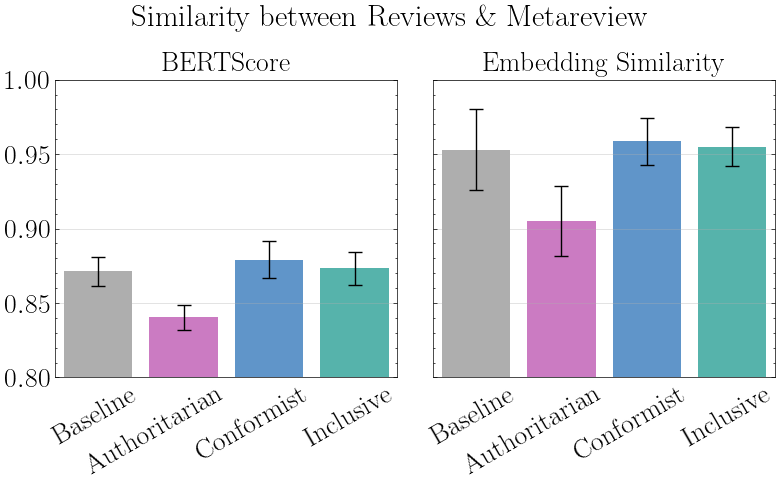

In [ ]:


plt.suptitle(r'Similarity between Reviews \& Metareview', fontsize=22)

# Define colors for the bars
colors = ['#aeaeae', '#d86ecc', '#4f95da', '#46c3b8']
FONT_SIZE = 20


df_bertscore = pd.DataFrame({
    'Setting': ['Baseline', 'Authoritarian', 'Conformist', 'Inclusive'],
    'Mean': [0.871186, 0.840460, 0.879104, 0.873193],
    'Stdev': [0.009998, 0.008486, 0.012472, 0.011310]
})

df_sentence_bert = pd.DataFrame({
    'Setting': ['Baseline', 'Authoritarian', 'Conformist', 'Inclusive'],
    'Mean': [0.952945, 0.904958, 0.958697, 0.955023],
    'Stdev': [0.027234, 0.023597, 0.015722, 0.013156]
})

# Create the bar plot
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

idx_plot = 0

# Set the aesthetic style of the plots
# sns.set_style("whitegrid")

plt.suptitle(r'Similarity between Reviews \& Metareview', fontsize=22)

for name, df in {
    'BERTScore': df_bertscore,
    'Embedding Similarity': df_sentence_bert
}.items():


    bar_plot = sns.barplot(x='Setting', y='Mean', data=df, ci=True, palette=colors, ax=axes[idx_plot])

    for i, row in df.iterrows():
        axes[idx_plot].errorbar(x=i, y=row['Mean'], yerr=row['Stdev'], fmt='none', c='black', capsize=5)

    axes[idx_plot].set_xlim(-0.5, len(df) - 0.5)
    axes[idx_plot].set_xlabel('')
    axes[idx_plot].set_ylabel('', fontsize=FONT_SIZE)
    axes[idx_plot].set_title(name, fontsize=FONT_SIZE)
    axes[idx_plot].set_ylim(0.8, 1.0)

    # Here we hide the x-ticks
    axes[idx_plot].tick_params(axis='x', labelsize=FONT_SIZE, which='both', length=0)

    # Get current x-tick labels
    current_labels = [label.get_text() for label in axes[idx_plot].get_xticklabels()]

    # Set new x-tick labels with rotation and horizontal alignment
    axes[idx_plot].set_xticklabels(current_labels, rotation=30, ha='right')

    axes[idx_plot].tick_params(axis='y', labelsize=FONT_SIZE)

    # Move x-ticks a little to the right
    ticks = axes[idx_plot].get_xticks()
    new_ticks = (np.array(ticks) + 0.5).tolist()
    axes[idx_plot].set_xticks(new_ticks)
    axes[idx_plot].grid(axis='y', alpha=0.5)

    idx_plot += 1


plt.tight_layout()
plt.savefig('barplot_similarity_review_metareview.pdf', bbox_inches='tight')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34bbb3e4-63c3-48b7-83bd-85fd642ee383' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>